In [3]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

HOUSING_PATH = "/WEKAFinalInputFile.csv"
HOUSING_URL = "C:/Users/shwet/OneDrive/Documents/ML/FinalExam"
csv_path = os.path.join(HOUSING_URL, "WEKAFinalInputFile.csv")
shark_data = pd.read_csv(csv_path)
shark_data.head()

,Unnamed: 0,X.2,X.1,X,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,...,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain,Unnamed: 73
0,1,1,1,1,4,5/4/09,25,0.0,Low,0.0,...,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low,NaN
1,2,2,2,2,5,5/5/09,33,0.0,Low,0.0,...,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium,NaN
2,3,3,3,3,7,5/7/09,49,1.0,Low,0.0,...,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low,NaN
3,4,4,4,4,8,5/8/09,57,0.0,Low,0.0,...,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low,NaN
4,5,5,5,5,11,5/11/09,81,2.0,Low,0.0,...,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium,NaN


In [4]:
shark_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 74 columns):
Unnamed: 0                         186 non-null int64
X.2                                186 non-null int64
X.1                                186 non-null int64
X                                  186 non-null int64
Id                                 186 non-null int64
Date                               186 non-null object
ID                                 186 non-null int64
TurtleExactCountSC                 151 non-null float64
turtleexactdiscretizeSC            151 non-null object
TurtleExactCountNC                 149 non-null float64
TurtleExactCombined                186 non-null int64
TurtleexactdiscretizeNC            149 non-null object
TurtleAttackActivity               72 non-null float64
TurtleAttackActivityDiscretized    72 non-null object
Area                               72 non-null object
Location                           72 non-null object
Time                   

In [13]:
shark_data.head()

,Unnamed: 0,X.2,X.1,X,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,...,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain,Unnamed: 73
0,1,1,1,1,4,5/4/09,25,0.0,Low,0.0,...,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low,NaN
1,2,2,2,2,5,5/5/09,33,0.0,Low,0.0,...,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium,NaN
2,3,3,3,3,7,5/7/09,49,1.0,Low,0.0,...,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low,NaN
3,4,4,4,4,8,5/8/09,57,0.0,Low,0.0,...,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low,NaN
4,5,5,5,5,11,5/11/09,81,2.0,Low,0.0,...,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium,NaN


In [7]:
#Neural networks prediction
import numpy as np
from sklearn.neural_network import MLPClassifier
#Neural networks prediction
from sklearn.neural_network import MLPClassifier#Neural networks prediction
from sklearn.neural_network import MLPClassifier#Neural networks prediction
from sklearn.neural_network import MLPClassifier

shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])

shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])

shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])
shark_data_neural = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax', 'Attack']]

shark_data_neural['Attack'] = shark_data_neural['Attack'].astype('category')
shark_data_neural['Attack'] = shark_data_neural['Attack'].cat.codes

#df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(shark_data_neural)) < 0.7

train = shark_data_neural[msk]

test = shark_data_neural[~msk]

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15,), random_state=1)

clf.fit(train.ix[:, train.columns != 'Attack'], train.ix[:, train.columns == 'Attack'])

clf.predict(test.ix[:, train.columns != 'Attack'])

C:\Users\shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\shwet\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/p

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int8)

In [8]:
#K means prediction

from sklearn.cluster import KMeans
import numpy as np

shark_data_kmeans = shark_data[['Precipitation_minmax','StationPressure_minmax','WindSpeed_minmax','Salinity_minmax','Turbidity_minmax','Dissolved02_minmax','WaterTemp_minmax','Turtle_minmax','Crablandings_minmax']]

kmeans = KMeans(n_clusters=2, random_state=0).fit(shark_data_kmeans)
kmeans.labels_

kmeans.cluster_centers_

array([[ 0.05546218,  0.5748194 ,  0.40130719,  0.68564472,  0.07634452,
         0.59091762,  0.71973986,  0.18896707,  0.80387701],
       [ 0.02562942,  0.59458051,  0.29864751,  0.73342684,  0.0385373 ,
         0.61208168,  0.75439645,  0.12819177,  0.27582566]])

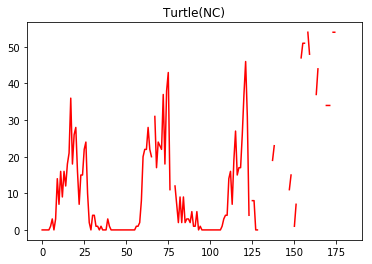

In [15]:
# graph of turtle count  in NC
import matplotlib.pyplot as plt
plt.plot(shark_data['TurtleExactCountNC'],color='red',label='Turtle(NC)')
plt.title('Turtle(NC)')
# plt.xlabels('')
plt.show()

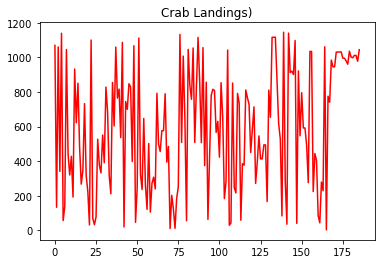

In [16]:
# graph of Crab Landings count  in NC and SC
import matplotlib.pyplot as plt
plt.plot(shark_data['CrabLandings'],color='red',label='Crab Landings)')
plt.title('Crab Landings)')
# plt.xlabels('')
plt.show()

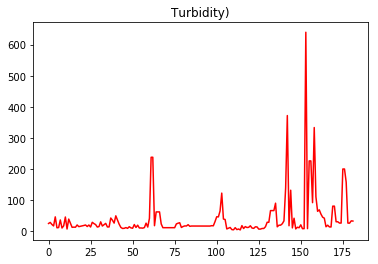

In [19]:
    # graph of turbidity of sea water
    import matplotlib.pyplot as plt
    plt.plot(shark_data['Turbidity'],color='red',label='Turbidity)')
    plt.title('Turbidity)')
    # plt.xlabels('')
    plt.show()